# 🧠 Neural Network from Scratch — Letter Classifier

### ✅ Project Objective  
To build a simple feedforward neural network **from scratch using NumPy** to classify synthetic images of the letters **A, B, and C**, represented as **binary 5×6 pixel grids**.  
The network includes one hidden layer and uses **sigmoid activation** and **backpropagation** for learning.

### 🔧 Tools Used
- Python
- NumPy
- Matplotlib
- Jupyter Notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 🗂️ Dataset: Synthetic Binary Images

Each image is a 5×6 grid (flattened to 30 pixels) representing the letters **A**, **B**, and **C** using binary values (0 and 1).

Labels are one-hot encoded as:
- A → [1, 0, 0]
- B → [0, 1, 0]
- C → [0, 0, 1]

In [2]:
# 5x6 characters flattened into 30 pixels each
letter_A = np.array([
    [0,1,1,1,0,
     1,0,0,0,1,
     1,1,1,1,1,
     1,0,0,0,1,
     1,0,0,0,1,
     0,0,0,0,0]
])

letter_B = np.array([
    [1,1,1,1,0,
     1,0,0,0,1,
     1,1,1,1,0,
     1,0,0,0,1,
     1,1,1,1,0,
     0,0,0,0,0]
])

letter_C = np.array([
    [0,1,1,1,1,
     1,0,0,0,0,
     1,0,0,0,0,
     1,0,0,0,0,
     0,1,1,1,1,
     0,0,0,0,0]
])

# Dataset and labels
X = np.array([letter_A, letter_B, letter_C]).reshape(3, 30)
y = np.array([
    [1, 0, 0],  # A
    [0, 1, 0],  # B
    [0, 0, 1]   # C
])

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def one_hot_to_label(output):
    return np.argmax(output)

In [4]:
np.random.seed(42)
input_size = 30
hidden_size = 10
output_size = 3
epochs = 10000
learning_rate = 0.1

weights_input_hidden = np.random.randn(input_size, hidden_size)
weights_hidden_output = np.random.randn(hidden_size, output_size)
bias_hidden = np.zeros((1, hidden_size))
bias_output = np.zeros((1, output_size))

loss_history = []

In [5]:
for epoch in range(epochs):
    # Forward
    hidden_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    final_output = sigmoid(final_input)

    # Loss
    loss = np.mean((y - final_output) ** 2)
    loss_history.append(loss)

    # Backprop
    error = y - final_output
    d_output = error * sigmoid_derivative(final_output)

    error_hidden = np.dot(d_output, weights_hidden_output.T)
    d_hidden = error_hidden * sigmoid_derivative(hidden_output)

    # Update weights and biases
    weights_hidden_output += hidden_output.T.dot(d_output) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden) * learning_rate
    bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    bias_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

    # Print every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

Epoch 0, Loss: 0.3944
Epoch 1000, Loss: 0.0035
Epoch 2000, Loss: 0.0015
Epoch 3000, Loss: 0.0010
Epoch 4000, Loss: 0.0007
Epoch 5000, Loss: 0.0006
Epoch 6000, Loss: 0.0005
Epoch 7000, Loss: 0.0004
Epoch 8000, Loss: 0.0003
Epoch 9000, Loss: 0.0003


Actual: A, Predicted: A


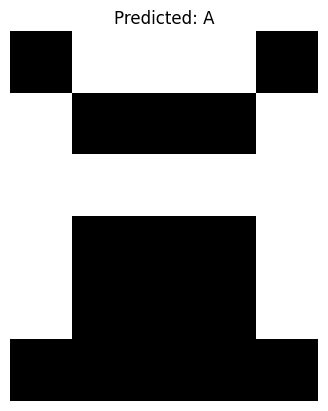

Actual: B, Predicted: B


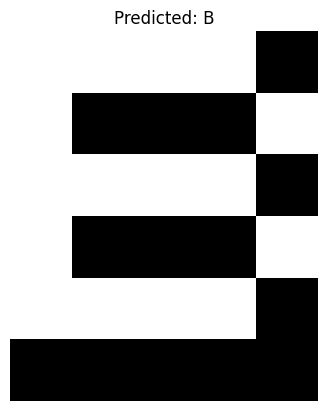

Actual: C, Predicted: C


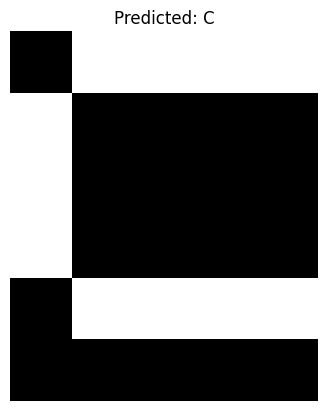

In [6]:
def predict(img):
    h = sigmoid(np.dot(img, weights_input_hidden) + bias_hidden)
    o = sigmoid(np.dot(h, weights_hidden_output) + bias_output)
    return one_hot_to_label(o)

# Predict and visualize results
letters = ['A', 'B', 'C']
for i, img in enumerate(X):
    prediction = predict(img)
    print(f"Actual: {letters[i]}, Predicted: {letters[prediction]}")
    plt.imshow(img.reshape(6, 5), cmap='gray')
    plt.title(f"Predicted: {letters[prediction]}")
    plt.axis('off')
    plt.show()

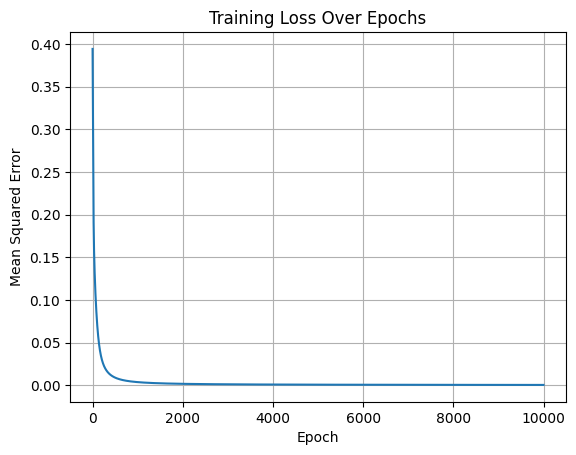

In [7]:
plt.plot(loss_history)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()